In [ ]:
# Md Ahsanul Mahbub Zobayer
# Matric: 2125129

In [52]:
import pandas as pd

# Load data
df = pd.read_csv("derifactor.csv")
#prit basis data
print("Shape:", df.shape)  # (rows, columns)
print("Columns:", df.columns.tolist())

# the unique entities and years
print("Unique Entities:", df['Entity'].nunique())
print("Year Range:", df['Year'].min(), "to", df['Year'].max())

#Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Summary statistic
print("Descriptive Statistics:")
print(df.describe())


Shape: (6468, 31)
Columns: ['Entity', 'Year', 'Unsafe water source', 'Unsafe sanitation', 'No access to handwashing facility', 'Household air pollution from solid fuels', 'Non-exclusive breastfeeding', 'Discontinued breastfeeding', 'Child wasting', 'Child stunting', 'Low birth weight for gestation', 'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits', 'Diet low in vegetables', 'Unsafe sex', 'Low physical activity', 'High fasting plasma glucose', 'High total cholesterol', 'High body-mass index', 'High systolic blood pressure', 'Smoking', 'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density', 'Air pollution', 'Outdoor air pollution', 'Diet high in sodium', 'Diet low in whole grains', 'Diet low in nuts and seeds']
Unique Entities: 231
Year Range: 1990 to 2017
Missing values per column:
Entity                                         0
Year                                           0
Unsafe water source                            0
Unsafe sanitation          

In [53]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

#browser for rendering
pio.renderers.default = 'browser'


# Count entries per country
country_counts = df['Entity'].value_counts().reset_index()
country_counts.columns =['Country', 'Count']

# Create choropleth map
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Number of Data Entries per Country (1990–2017)'
)

# Show in browser
fig.show()


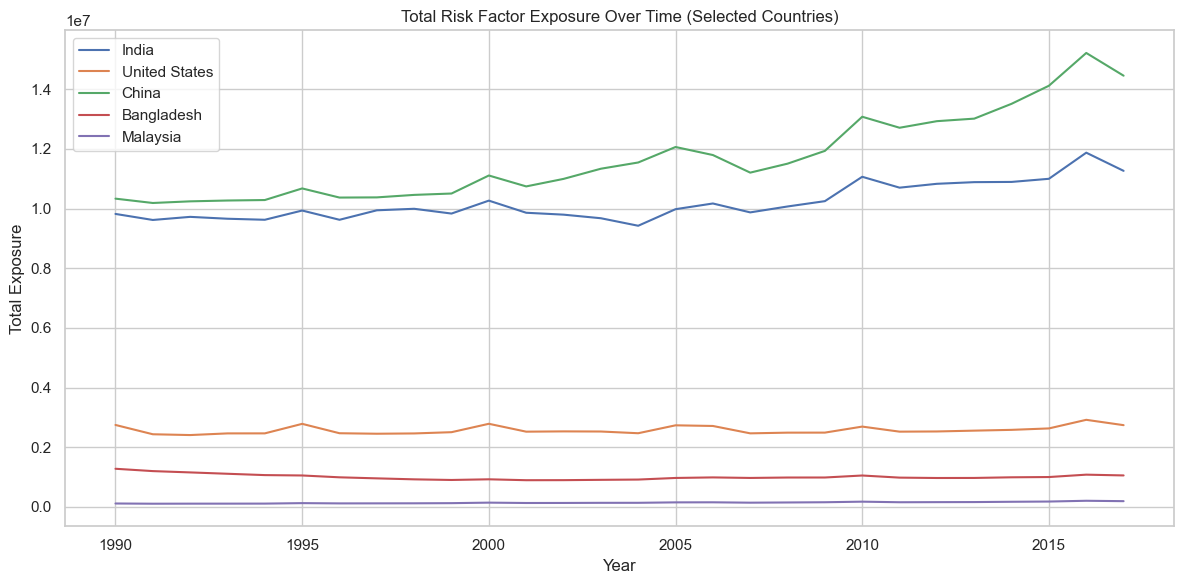

In [54]:
import matplotlib.pyplot as plt

# my choosen countries
selected_countries = ['India', 'United States', 'China', 'Bangladesh', 'Malaysia']
columns_to_sum = df.columns.difference(['Entity', 'Year'])

#filter and sum risk exposures
trend_df = df[df['Entity'].isin(selected_countries)].copy()
trend_df['Total_Risk_Exposure'] = trend_df[columns_to_sum].sum(axis=1)

# Plot
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = trend_df[trend_df['Entity']==country]
    plt.plot(country_data['Year'], country_data['Total_Risk_Exposure'],label=country)

plt.title('Total Risk Factor Exposure Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Total Exposure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


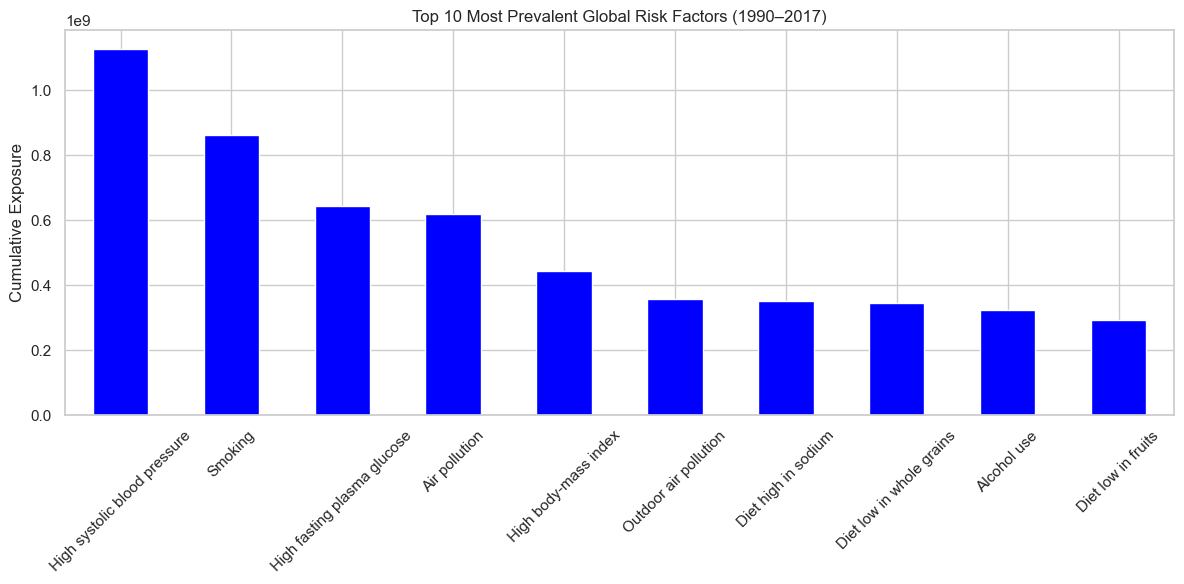

In [55]:
#Sum each risk factor column globally
risk_factors = df.columns.difference(['Entity', 'Year'])
global_totals = df[risk_factors].sum().sort_values(ascending=False)

# bar chart for top 10 global risk exposures
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
global_totals.head(10).plot(kind='bar',color='blue')
plt.title('Top 10 Most Prevalent Global Risk Factors (1990–2017)')
plt.ylabel('Cumulative Exposure')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


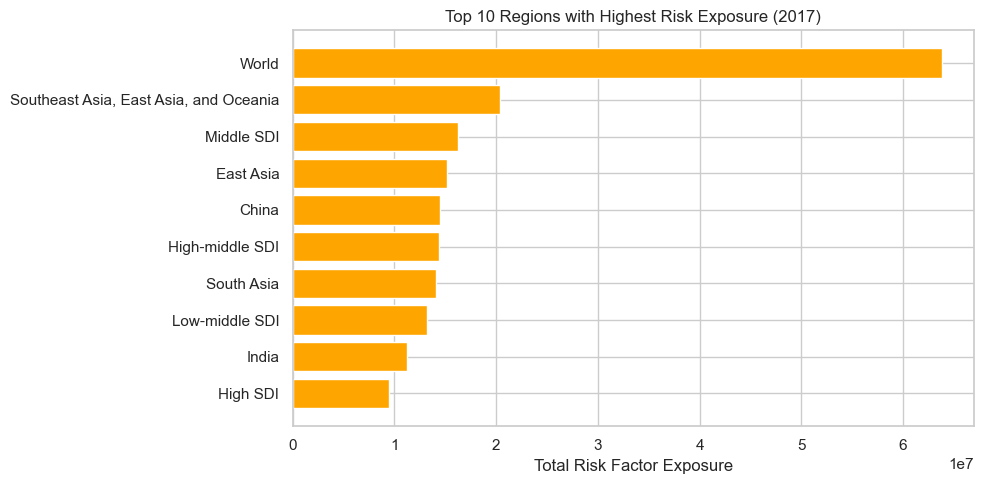

In [56]:
# Filter for year 2017 (I choose the most recent one)
latest_year = df[df['Year']== 2017].copy()
latest_year['Total_Risk'] = latest_year[risk_factors].sum(axis=1)

#Top 10 regions with highest total exposure
top_reg = latest_year[['Entity', 'Total_Risk']].sort_values(by='Total_Risk', ascending=False).head(10)

# visualization
plt.figure(figsize=(10, 5))
plt.barh(top_reg['Entity'],top_reg['Total_Risk'],color='orange')
plt.title('Top 10 Regions with Highest Risk Exposure (2017)')
plt.xlabel('Total Risk Factor Exposure')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


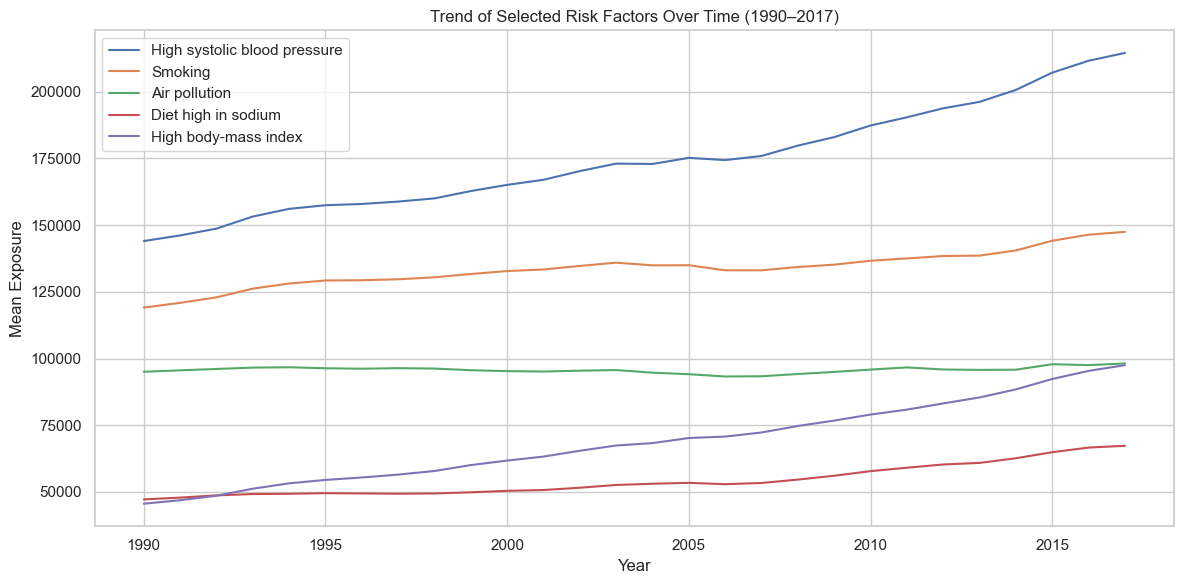

In [57]:
# Average exposure per year vs global trend
yearly_totals = df.groupby('Year')[risk_factors].mean()

# I choosed 5 interesting risk factors from the previous result
selected = ['High systolic blood pressure', 'Smoking', 'Air pollution', 'Diet high in sodium', 'High body-mass index']
yearly_totals[selected].plot(figsize=(12, 6))
plt.title('Trend of Selected Risk Factors Over Time (1990–2017)')
plt.ylabel('Mean Exposure')
plt.grid(True)
plt.tight_layout()
plt.show()


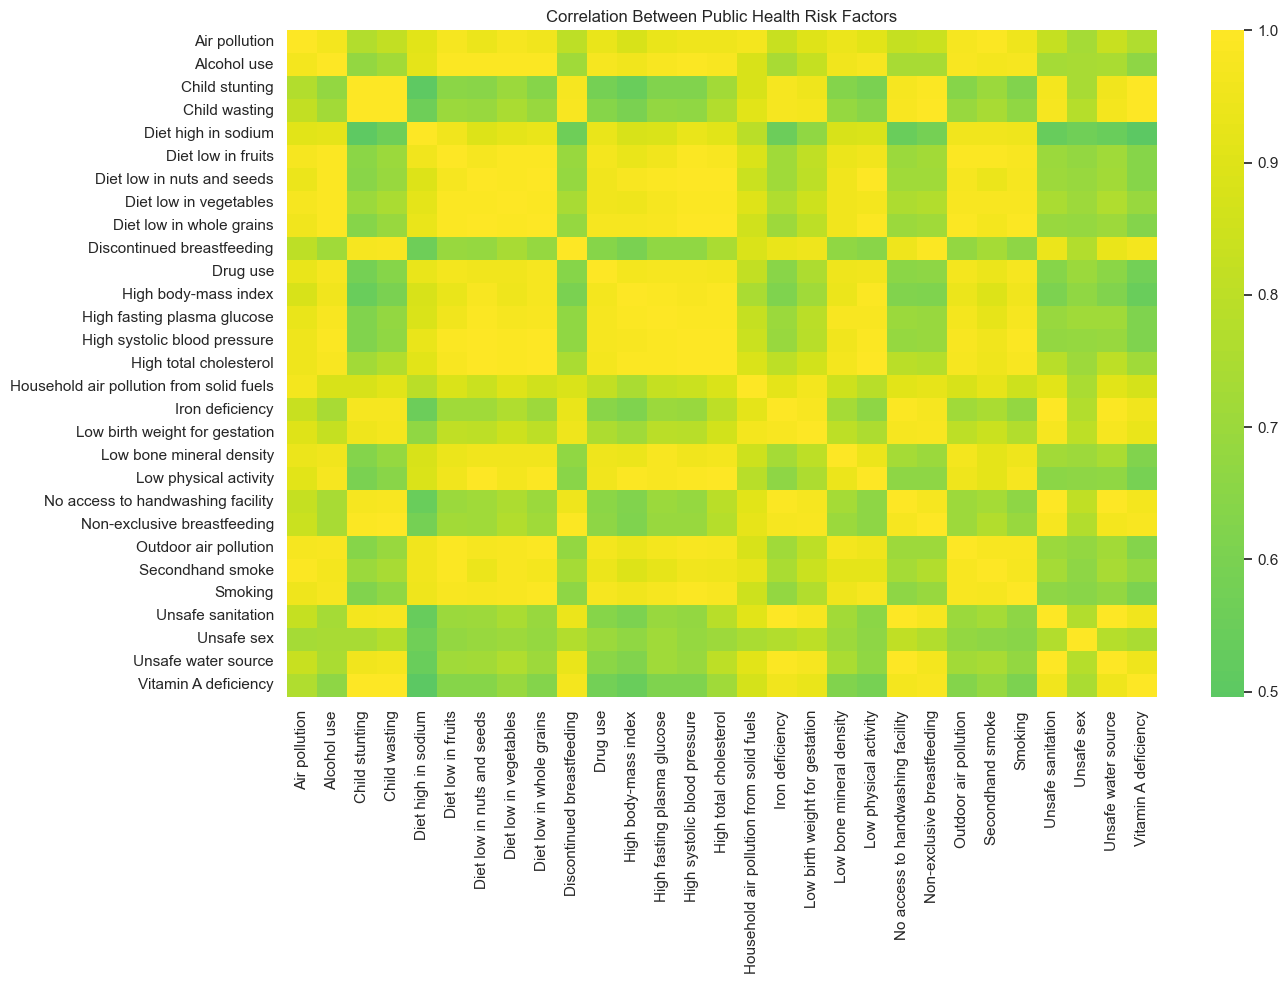

In [58]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df[risk_factors].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='viridis',center=0, annot=False)
plt.title('Correlation Between Public Health Risk Factors')
plt.tight_layout()
plt.show()


C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\165605142.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




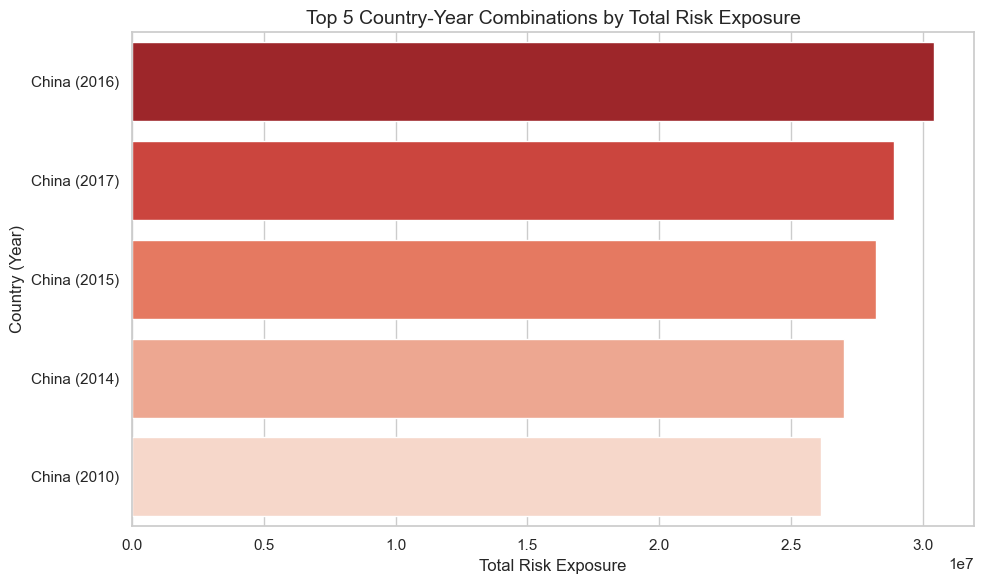

In [59]:

spikes['Entity_Year'] = spikes['Entity'] + ' (' + spikes['Year'].astype(str) + ')'

#Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=spikes,x='Total_Risk', y='Entity_Year',palette='Reds_r')

# Add titles and labels
plt.title('Top 5 Country-Year Combinations by Total Risk Exposure', fontsize=14)
plt.xlabel('Total Risk Exposure')
plt.ylabel('Country (Year)')

# Show plot
plt.tight_layout()
plt.show()



C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\4292616659.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\4292616659.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




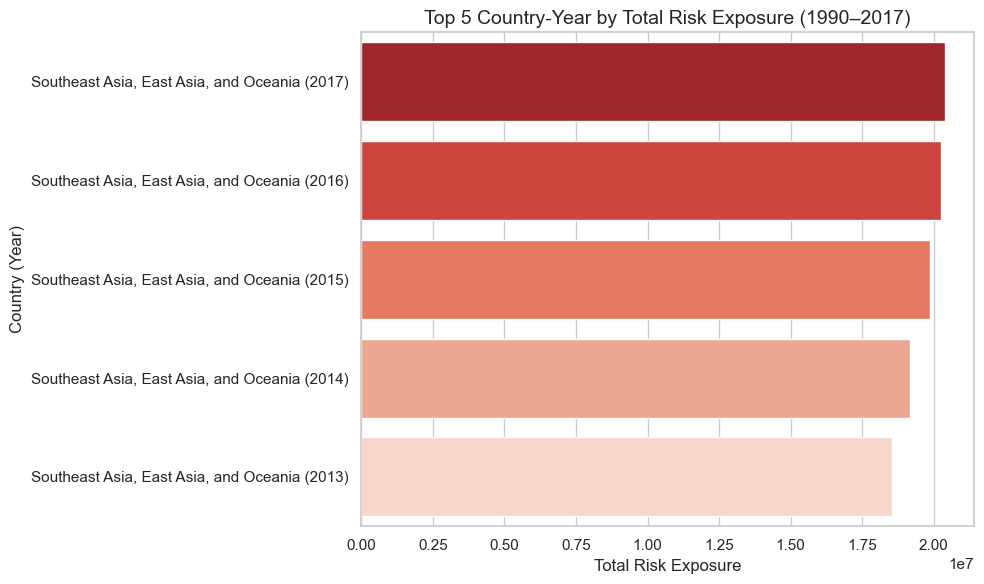

In [60]:
# removing this because now I only want to check countries/regions
non_countries = [
    'World'
]

# Filter dataset to exclude non-country entities
df_countries = df[~df['Entity'].isin(non_countries)]
# Recalculate total Risk
risk_factors = df.columns[2:]  # first 2 columns are 'Entity' and 'Year'
df_countries['Total_Risk']= df_countries[risk_factors].sum(axis=1)

# finding top 5
spikes = df_countries.sort_values(by='Total_Risk', ascending=False).head(5)

#labeling
spikes['Entity_Year'] = spikes['Entity'] + ' (' + spikes['Year'].astype(str) + ')'

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=spikes, x='Total_Risk',y='Entity_Year', palette='Reds_r')

plt.title('Top 5 Country-Year by Total Risk Exposure (1990–2017)', fontsize=14)
plt.xlabel('Total Risk Exposure')
plt.ylabel('Country (Year)')
plt.tight_layout()
plt.show()

C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\3812965422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\3812965422.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




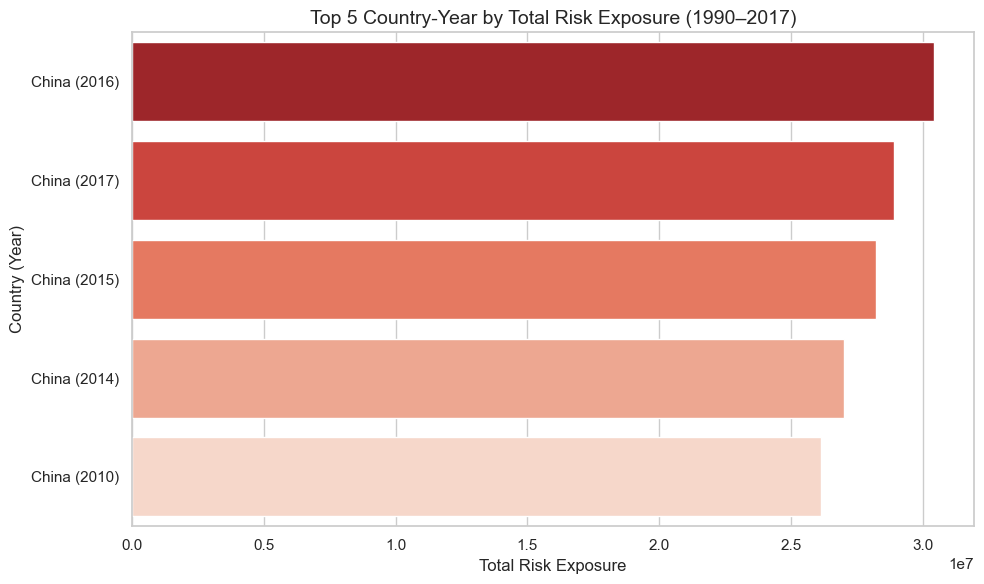

In [35]:
# removing this because now I only want to chek countries(I did it manually removed one by one after result)
non_countries = [
    'World', 'Asia', 'Europe', 'Africa', 'Americas', 'Oceania',
    'European Union', 'Sub-Saharan Africa', 'High SDI countries',
    'Low SDI countries', 'High-middle SDI', 'Low-middle SDI','Middle SDI',
    'Low-income countries', 'Central Europe', 'Western Europe',
    'Eastern Europe', 'Southeast Asia', 'South Asia', 'Central Asia','Southeast Asia, East Asia, and Oceania',
    'East Asia', 'North Africa', 'Latin America'
]

# Filter dataset to exclude non-country entities
df_countries = df[~df['Entity'].isin(non_countries)]
# Recalculate total Risk
risk_factors = df.columns[2:]  #first 2 columns are 'Entity' and 'Year'
df_countries['Total_Risk']= df_countries[risk_factors].sum(axis=1)

# Get top 5
spikes = df_countries.sort_values(by='Total_Risk', ascending=False).head(5)

# labeling
spikes['Entity_Year'] = spikes['Entity'] + ' (' + spikes['Year'].astype(str) + ')'

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=spikes, x='Total_Risk', y='Entity_Year', palette='Reds_r')

plt.title('Top 5 Country-Year by Total Risk Exposure (1990–2017)', fontsize=14)
plt.xlabel('Total Risk Exposure')
plt.ylabel('Country (Year)')
plt.tight_layout()
plt.show()


C:\Users\zobayer\AppData\Local\Temp\ipykernel_18924\3695368765.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




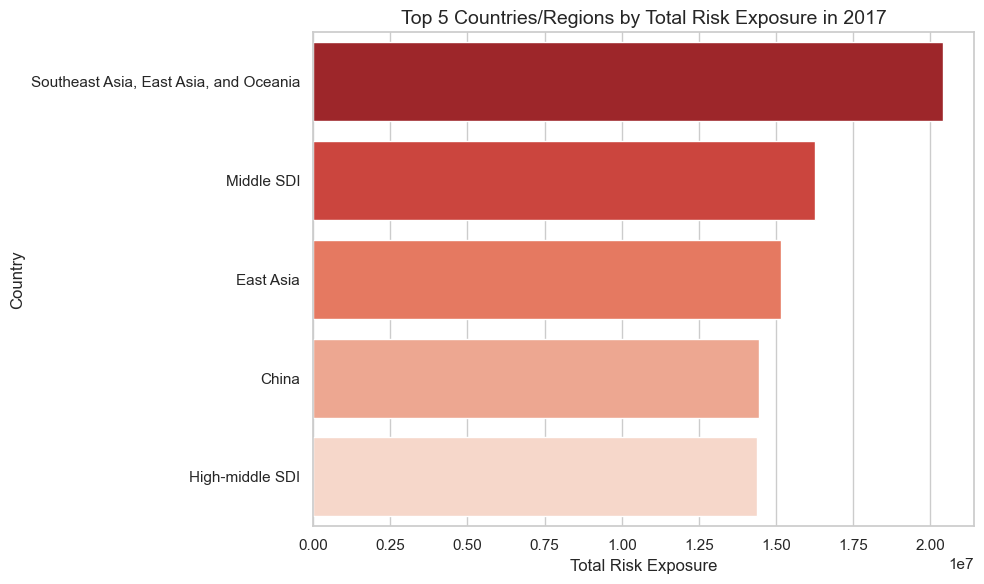

In [61]:
# just want to check the regions/countries
non_countries = [
    'World'
]
#choosed 2017 most recent one
df_2017 = df[(df['Year'] == 2017) & (~df['Entity'].isin(non_countries))].copy()

risk_factors = df.columns[2:]
df_2017['Total_Risk'] =df_2017[risk_factors].sum(axis=1)

#  top 5 countries
top_5_2017 = df_2017.sort_values(by='Total_Risk', ascending=False).head(5)

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_2017, x='Total_Risk',y='Entity',palette='Reds_r')

plt.title('Top 5 Countries/Regions by Total Risk Exposure in 2017',fontsize=14)
plt.xlabel('Total Risk Exposure')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

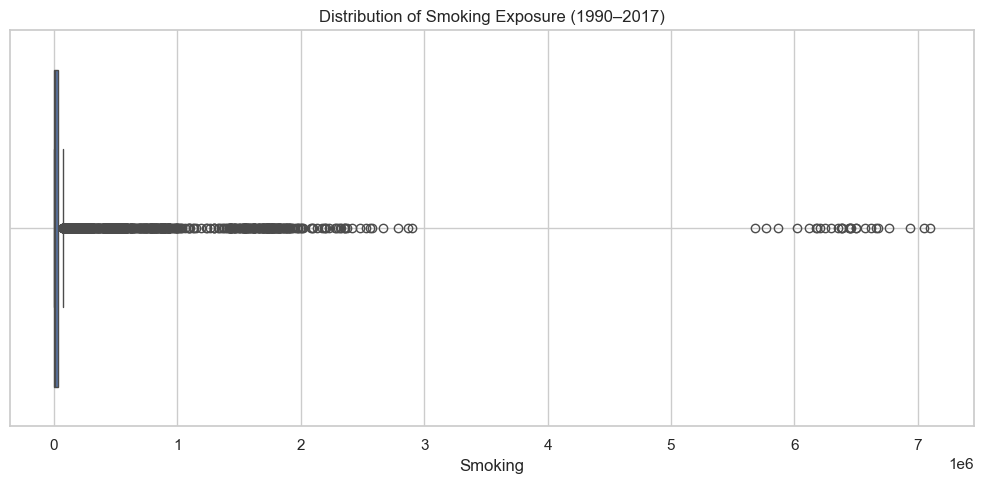

In [62]:
# Going into dipper about smoking entity

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Smoking'])
plt.title('Distribution of Smoking Exposure (1990–2017)')
plt.xlabel('Smoking')
plt.grid(True)
plt.tight_layout()
plt.show()


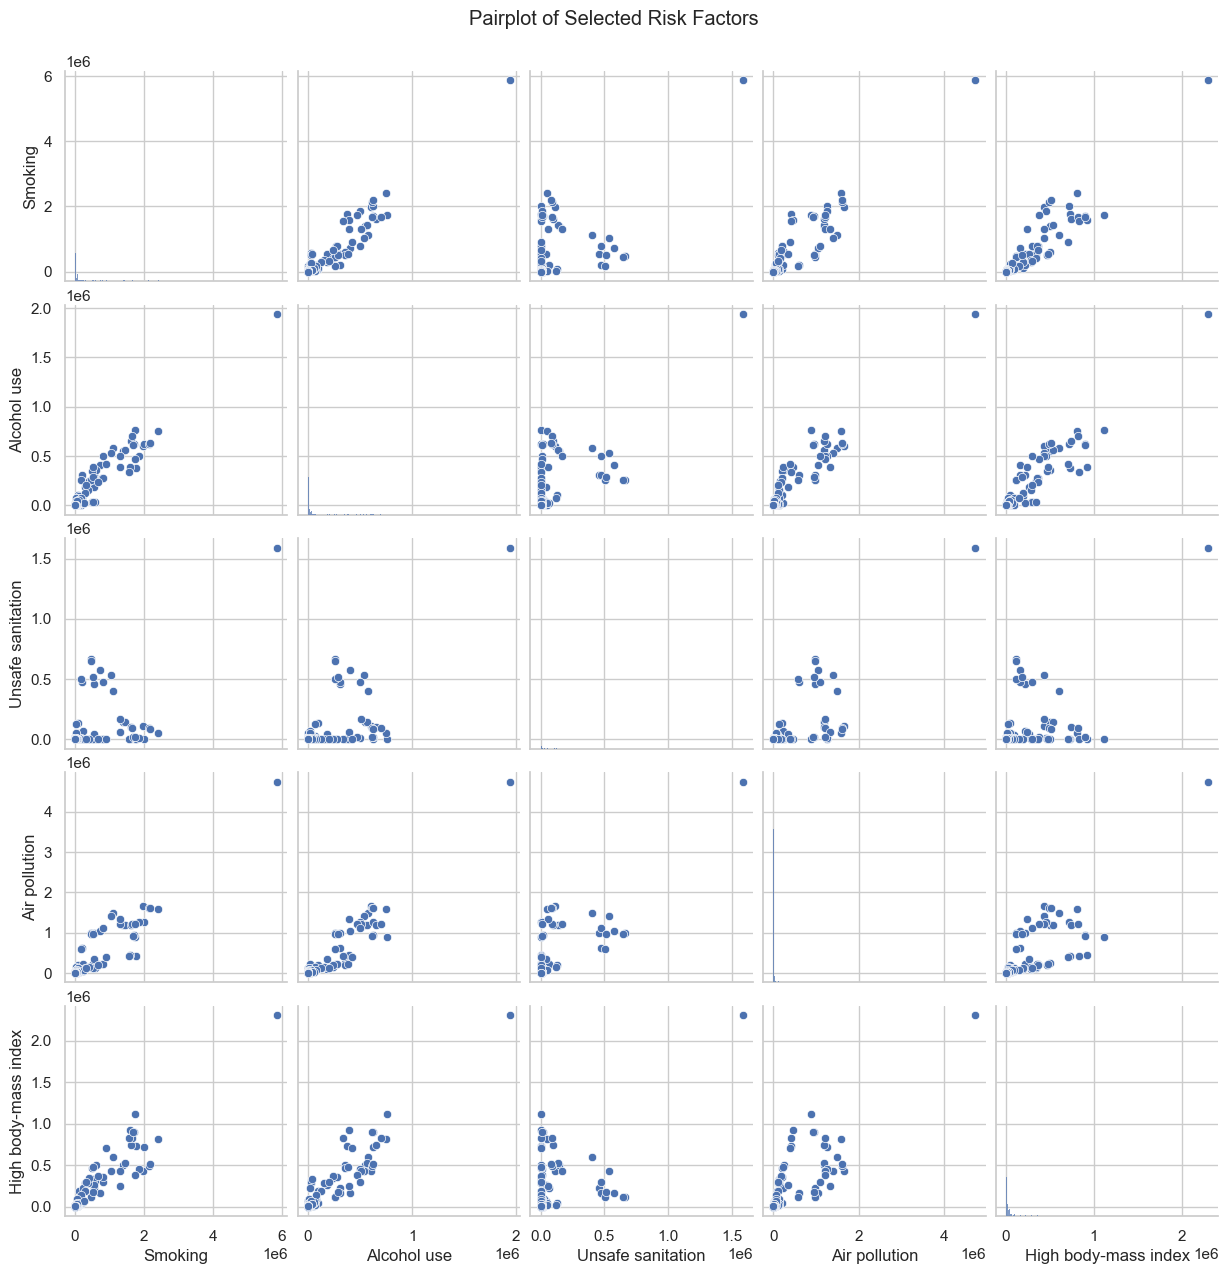

In [63]:
#groupings between selected risk factors that i choose
selected_cols = ['Smoking', 'Alcohol use', 'Unsafe sanitation', 'Air pollution', 'High body-mass index']

sampled_df = df[selected_cols].sample(500, random_state=42)

# Pairplot
sns.pairplot(sampled_df)
plt.suptitle('Pairplot of Selected Risk Factors', y=1.02)
plt.show()


c:\Users\zobayer\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



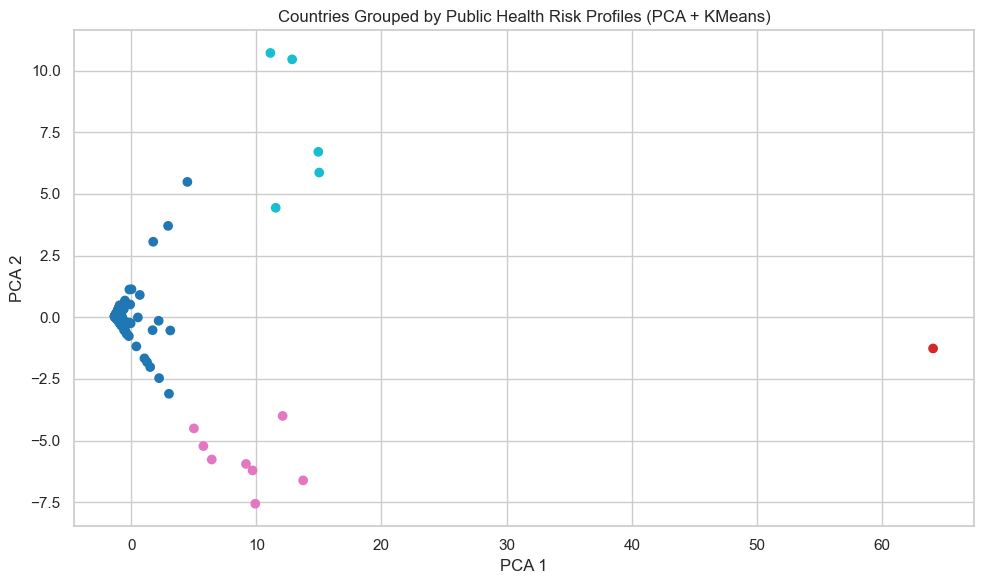


Cluster 0:
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia']

Cluster 1:
['World']

Cluster 2:
['Central Europe, Eastern Europe, and Central Asia', 'China', 'East Asia', 'High SDI', 'High-income', 'High-middle SDI', 'Middle SDI', 'Southeast Asia, East Asia, and Oceania']

Cluster 3:
['India', 'Low SDI', 'Low-middle SDI', 'South Asia', 'Sub-Saharan Africa']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Country level averages
country_avg = df.groupby('Entity')[risk_factors].mean()

# Handle missing values
country_avg_filled = country_avg.fillna(country_avg.mean())

#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_avg_filled)

#KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
country_avg_filled['Cluster'] = clusters

#PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# visualization plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='tab10')
plt.title('Countries Grouped by Public Health Risk Profiles (PCA + KMeans)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

#top 10 countries in each cluster
for i in range(4):
    print(f"\nCluster {i}:")
    cluster_countries = country_avg_filled[country_avg_filled['Cluster'] == i].index.tolist()
    print(cluster_countries[:10])
